In [10]:
from IPython.display import HTML


**Explorativ analyse og data visualization**

`Claus Mørkbak Højrup – Revision og dataanalyse oktober 2022.`

Nedenstående er en Jupyter Notebook. Notebooks kan køre på forskellige kernels såsom R eller Python. Denne kører på Python. En Notebook kombinerer skriftlige celler og udregningsceller. I denne notebook skal vi undersøge et datasæt fra Stanford Open Policing Project. Projektet har samlet og standardiseret data fra politiafdelinger i USA og viser stop af enten køretøjer eller fodgængere.  

Resten af denne notebook er på engelsk, da det vil nemmere for jer at google begreber senere.

They have already gathered 130 million records from 31 state police agencies and have begun collecting data on stops from law enforcement agencies in major cities, as well.

**Exploratory data analysis**
In statistics, exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods


In [11]:
HTML('<iframe width="800" height="500" src="https://www.youtube-nocookie.com/embed/PelSGxTPlXM?rel=0&amp;controls=0&amp;showinfo=0&amp;start=435" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')


/usr/local/lib/python3.7/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**Let's get started**
First we'll download the latest dataset directly from the Stanford server. To do that we use Jupyter's ! command line magic. Passing a ! in a code cell, will send the command to shell rather than Python or R. !wget will open the GNU Wget Unix/Linux program that downloads content from web servers.

In [12]:
# Download the semi-raw data
#!wget https://stacks.stanford.edu/file/druid:py883nd2578/RI-clean.csv.gz
#!wget https://storage.googleapis.com/sds-file-transfer/CT-clean.csv.gz
!wget https://storage.googleapis.com/sds-file-transfer/RI-clean.csv.gz

--2022-10-14 19:46:46--  https://storage.googleapis.com/sds-file-transfer/RI-clean.csv.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.251.18.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6026983 (5.7M) [application/gzip]
Saving to: ‘RI-clean.csv.gz’

RI-clean.csv.gz     100%[===================>]   5.75M  --.-KB/s    in 0.08s   

2022-10-14 19:46:46 (69.8 MB/s) - ‘RI-clean.csv.gz’ saved [6026983/6026983]



In [13]:
# Unzip the file to get a csv
!gunzip RI-clean.csv.gz

gzip: RI-clean.csv already exists; do you wish to overwrite (y or n)? y


In [14]:
!ls -lh


total 75M
-rw-r--r-- 1 root root  75M Sep  5  2018 RI-clean.csv
drwxr-xr-x 1 root root 4.0K Oct  7 13:35 sample_data


Let's import pandas as pd. The appbriviation pd is a convention. We also load the data using pandas's read_csv command. Pandas will try to infer the appropriate datatypes dor all columns. We set the low_memory argument to False, which is often done in cases with possible mixed datatypes. By the way: You if you place the cursor after the '(' after a command and use string+tab, you can read the docummentation for the particular command or function.

In [15]:
import pandas as pd

In [16]:
data = pd.read_csv('RI-clean.csv', low_memory=False)

We can examine the dataset in several ways, for instance, by checking the first couple of rows or by printing the "info".

In [17]:
#Display the first 5 (or more/less rows) of each column
data.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,000,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


Each row is one traffic stop
NaN are missing values

In [18]:
#Display overview information for the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509681 entries, 0 to 509680
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     509681 non-null  object 
 1   state                  509681 non-null  object 
 2   stop_date              509671 non-null  object 
 3   stop_time              509671 non-null  object 
 4   location_raw           509681 non-null  object 
 5   county_name            0 non-null       float64
 6   county_fips            0 non-null       float64
 7   fine_grained_location  0 non-null       float64
 8   police_department      509671 non-null  object 
 9   driver_gender          480584 non-null  object 
 10  driver_age_raw         480632 non-null  float64
 11  driver_age             478986 non-null  float64
 12  driver_race_raw        480608 non-null  object 
 13  driver_race            480608 non-null  object 
 14  violation_raw          480608 non-nu

In [19]:
# print the shape of the DF as an easy alternative to looking up this in info.
data.shape

(509681, 26)

Manglende værdier

In [20]:
# Show missing values (mask), cut to the first 10 rows. Note, that python index alsways starts with 0!
data.isnull()[:10]

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,False,True,...,False,True,True,False,True,True,True,True,False,False
3,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
5,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
6,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
7,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
9,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# The isnull command generates a dataframe with bool (True/False) outputs that you can apply commands on.
data.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

We can see that the county_name column is all missing. And thus we can drop it. Also, we probably should drop all cases, where we don't know the time and date of the stop, the gender of the driver

In [22]:
# We drop the county_fips, county_name and fine_grained_location columns.
data.drop(['county_name', 'county_fips', 'fine_grained_location'], axis='columns', inplace=True)

In [23]:
# Drop all columns where stop_data, time, and driver_gender are missing
data.dropna(subset=['stop_date', 'stop_time', 'driver_gender'], inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480584 entries, 0 to 509670
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  480584 non-null  object 
 1   state               480584 non-null  object 
 2   stop_date           480584 non-null  object 
 3   stop_time           480584 non-null  object 
 4   location_raw        480584 non-null  object 
 5   police_department   480584 non-null  object 
 6   driver_gender       480584 non-null  object 
 7   driver_age_raw      480583 non-null  float64
 8   driver_age          478946 non-null  float64
 9   driver_race_raw     480584 non-null  object 
 10  driver_race         480584 non-null  object 
 11  violation_raw       480584 non-null  object 
 12  violation           480584 non-null  object 
 13  search_conducted    480584 non-null  object 
 14  search_type_raw     17762 non-null   object 
 15  search_type         17762 non-null

In [25]:
# let's check this potential candidate column
data.is_arrested.head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

This column should be boolian but for some reason ended up being a string (or object). This is not efficient and limits our options in terms of what we can do with it. Therefore, we will change the datatype.

On bracket vs. dot notation:
In Python you will find 2 notation types. [ ] and .

``` ri['is_arrested'] is the same as ri.is_arrested````

However, if you assign something and have it on the left side of = you should always use [ ] notation

In [26]:
# Assign the is_arrested column a new datatype
data['is_arrested'] = data.is_arrested.astype('bool')

**Is there another column that may suffer from this problem?**




**Adjusting dates, times and index**

As you can see, stop_date and time are objects. That's not very useful. Let's transform them into a handy date-time-index.

In [27]:
print(data.stop_date.head())

0    2005-01-02
1    2005-01-02
3    2005-01-04
4    2005-01-06
5    2005-01-12
Name: stop_date, dtype: object


In [28]:
print(data.stop_time.head())

0    01:55
1    20:30
3    12:55
4    01:30
5    08:05
Name: stop_time, dtype: object






First, we will concatenate the two columns into one. Second, we will ask pandas to parse it and set the DF's index as the date and time of the stop. This makes lots of sense, given that each row is an event.

In [29]:
# We start by concatenating the two string columns into one that we call combined, using str.cat

combined = data.stop_date.str.cat(data.stop_time, sep=' ')
print(combined.head())

0    2005-01-02 01:55
1    2005-01-02 20:30
3    2005-01-04 12:55
4    2005-01-06 01:30
5    2005-01-12 08:05
Name: stop_date, dtype: object


Now we can create a date_and_time column form our combined (Series - basically a DF with only one column). Finally we will set the index of the dateframe to be the column (instead of a normal index). This will open up for many options, e.g. resampling.

In [30]:
# Parse the combined series to datetime-format and assign it to a new column
data['date_and_time'] = pd.to_datetime(combined)


In [31]:
# Replace the standard index by the new column (which will in turn disappear)
data.set_index('date_and_time', inplace=True)

In [32]:
# data['district'] = data.county_name


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480584 entries, 2005-01-02 01:55:00 to 2015-12-31 23:48:00
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  480584 non-null  object 
 1   state               480584 non-null  object 
 2   stop_date           480584 non-null  object 
 3   stop_time           480584 non-null  object 
 4   location_raw        480584 non-null  object 
 5   police_department   480584 non-null  object 
 6   driver_gender       480584 non-null  object 
 7   driver_age_raw      480583 non-null  float64
 8   driver_age          478946 non-null  float64
 9   driver_race_raw     480584 non-null  object 
 10  driver_race         480584 non-null  object 
 11  violation_raw       480584 non-null  object 
 12  violation           480584 non-null  object 
 13  search_conducted    480584 non-null  object 
 14  search_type_raw     17762 non-null   object 
 15  

**Exploring the data step by step¶**
We will start with simple countrs, proportions, averages etc. and move from there to more advanced concepts

In [34]:
# We can explore unique values for a column (even if it's a string)
data.stop_outcome.unique()


array(['Citation', 'Arrest Driver', 'N/D', 'Warning', 'Arrest Passenger',
       'No Action'], dtype=object)

In [35]:
# count the distinct values
data.stop_outcome.value_counts()

Citation            428378
Warning              28840
Arrest Driver        14630
N/D                   3431
No Action             3332
Arrest Passenger      1973
Name: stop_outcome, dtype: int64

In [36]:
# there are many ways to do the same thing
data.groupby('stop_outcome').size()


stop_outcome
Arrest Driver        14630
Arrest Passenger      1973
Citation            428378
N/D                   3431
No Action             3332
Warning              28840
dtype: int64

In [37]:
# Value counts provides a nice proportions option
data.stop_outcome.value_counts(normalize=True)

Citation            0.891370
Warning             0.060010
Arrest Driver       0.030442
N/D                 0.007139
No Action           0.006933
Arrest Passenger    0.004105
Name: stop_outcome, dtype: float64

In [38]:
# Let's check distribution by race
data.driver_race.value_counts(normalize=True)

White       0.717286
Black       0.142695
Hispanic    0.110538
Asian       0.026684
Other       0.002797
Name: driver_race, dtype: float64

**Let's try out some hypotheses**
One hypothesis could be that the stop_outcome is different for different races. Discrimination?

In [39]:
# create 3 series for different races
black = data[data.driver_race == 'Black']
white = data[data.driver_race == 'White']
hispanic = data[data.driver_race == 'Hispanic']


In [40]:
black.stop_outcome.value_counts(normalize=True)

Citation            0.858495
Warning             0.067953
Arrest Driver       0.049273
N/D                 0.009085
Arrest Passenger    0.008151
No Action           0.007043
Name: stop_outcome, dtype: float64

In [41]:
white.stop_outcome.value_counts(normalize=True)

Citation            0.902485
Warning             0.057427
Arrest Driver       0.023814
No Action           0.006724
N/D                 0.006568
Arrest Passenger    0.002982
Name: stop_outcome, dtype: float64

In [42]:
hispanic.stop_outcome.value_counts(normalize=True)

Citation            0.852211
Warning             0.071005
Arrest Driver       0.052708
N/D                 0.008998
No Action           0.008377
Arrest Passenger    0.006701
Name: stop_outcome, dtype: float64

**Let's try out to come up with some interesting hypotheses and find answers using the methods that we learned so far.¶**



In [43]:
#You probably will have to 
#!pip install pandas_profiling

**Filtering my multiple conditions**
We can of cause chain filter conditions (you probably learned to do that in tha last session using R)

In [46]:
# note the ( ) around the conditions
hispanic_and_arrested = data[(data.driver_race == 'Hispanic')
                             & (data.is_arrested == True)]

In [47]:
hispanic_and_arrested.shape


(3156, 23)

In [48]:
# We can also ask for hispanic OR arrested (not sure how much that tells us)
hispanic_or_arrested = data[(data.driver_race == 'Hispanic')
                             | (data.is_arrested == True)]

In [49]:
hispanic_or_arrested.shape


(66570, 23)

**Rules for filtering**

& AND

| OR

Each condition must be surrounded by () and many are possible

== Equality

!= Inequality

Remember, that we are not making any statement about causation. This is purely a correlation exercise (so far!)

A bit on boolean series

True = 1 and False = 0 Which means that you can perform calculations on them:


In [50]:
# Create a DataFrame of male and female drivers stopped for speeding
female_and_speeding = data[(data.driver_gender == 'F') & (data.violation == 'Speeding')]
male_and_speeding = data[(data.driver_gender == 'M') & (data.violation == 'Speeding')]

# Compute the stop outcomes for drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64
Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64


In [51]:
# If you have multiple things that should be shown from one cell's output, it's better to print it out
print(data.is_arrested.dtype)
print(data.is_arrested.mean())

bool
0.03454755048024903


**Using groupby to compare groups**

Remember when we compared stop outcome rates by race? 
Well: That was not very elegant. We can certainly do better using the groupby function

In [ ]:
# Here we first group by the race and then calculate the mean for the arrested column
data.groupby('driver_race').is_arrested.mean()

We can see that black and Hispanic drivers end up more than twice as often arrested than white drivers. But perhaps geography plays a role and perhaps there are some outlier "bad neighborhoods"

In [52]:
# Group data by district and race and calculate the mean of a third factor
data.groupby(['district','driver_race']).is_arrested.mean()

district  driver_race
Zone K1   Asian          0.015432
          Black          0.046395
          Hispanic       0.057721
          Other          0.007692
          White          0.020008
Zone K2   Asian          0.014346
          Black          0.039542
          Hispanic       0.049544
          Other          0.008658
          White          0.024184
Zone K3   Asian          0.015227
          Black          0.047430
          Hispanic       0.046998
          Other          0.008869
          White          0.028010
Zone X1   Asian          0.016949
          Black          0.046414
          Hispanic       0.066277
          Other          0.000000
          White          0.017423
Zone X3   Asian          0.025432
          Black          0.065223
          Hispanic       0.059304
          Other          0.007692
          White          0.023365
Zone X4   Asian          0.029574
          Black          0.072436
          Hispanic       0.070166
          Other          0

In [53]:
# Which violations lead for the different genders to what rates of arrest?
data.groupby(['violation','driver_gender']).is_arrested.mean()

violation            driver_gender
Equipment            F                0.061614
                     M                0.060028
Moving violation     F                0.054380
                     M                0.058008
Other                F                0.115273
                     M                0.073684
Registration/plates  F                0.078598
                     M                0.088781
Seat belt            F                0.021972
                     M                0.028026
Speeding             F                0.006323
                     M                0.017032
Name: is_arrested, dtype: float64

**"protective frisk"**
Sometimes during stops if a search is conducted, the officer also checks the driver if they have a weapon. This is called a "protective frisk". Let's try to figure out if men are frisked more than women.

In [54]:
# Look at the different search types performed
data.search_type.value_counts()

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

Extracting a string

As you can see, search type is a multiple choice object/string column. Incident to Arrest and Pribable Cause are the most commont but combinations are possible. We can use the str.contains method to filter to filter out cases of interest. This will return a boolean series, which we can assign to a new varioable 'frisk' in our dataframe.

In [55]:
# We ask pandas to find out if the string in the search_type column contatins
# the sequence "Protective Frisk"
# We assign the result to a new column that we call "frisk"

data['frisk'] = data.search_type.str.contains('Protective Frisk', na = False)

In [56]:
# backup code in case you are not convinced that it worked
# this snippet shows the source and the boolean result side by side

# generate a data frame by concatenating source and target of the str.contains method. Note, that this concat
# of columns or rows is different from the str.cat that we learned before
frisks = pd.concat([data.search_type, data.search_type.str.contains('Protective Frisk', na = False)], axis=1)

# display the second column using the iloc selector (here useful since we have two columns with the same name)
frisks[frisks.iloc[:,1] == True]

,search_type,search_type
date_and_time,,
2005-02-09 03:05:00,"Probable Cause,Protective Frisk",True
2005-08-28 01:00:00,"Incident to Arrest,Protective Frisk",True
2005-10-01 16:20:00,"Protective Frisk,Reasonable Suspicion",True
2005-10-06 21:35:00,Protective Frisk,True
2005-10-07 11:33:00,Protective Frisk,True
...,...,...
2015-11-27 19:49:00,Protective Frisk,True
2015-12-06 10:33:00,Protective Frisk,True
2015-12-12 09:02:00,Protective Frisk,True


In [57]:
data['frisk'].sum()

1598

In [58]:
# Do men get frisked more often?
data.groupby('driver_gender').frisk.mean()

driver_gender
F    0.001251
M    0.004104
Name: frisk, dtype: float64

Using the datetime index to select data

What if you assume that things got better or worse over the years? Or perhaps the time of the day plays a role? 📈 

Remember we assigned a datetime column to our index? In case you need a recap:

combined = data.stop_date.str.cat(data.stop_time, sep=' ')

data['date_and_time'] = pd.to_datetime(combined)

data.set_index('date_and_time', inplace=True)

That allows us now to access the time dimension at various levles in our index.

data.index.day

data.index.month

data.index.day_name()

data.index.month_name()

We can now use that for groupby etc.

In [59]:
# Are things getting better or worse over the years?
data.groupby(data.index.year).frisk.mean()

date_and_time
2005    0.009197
2006    0.007632
2007    0.005684
2008    0.003840
2009    0.003692
2010    0.002181
2011    0.001548
2012    0.000659
2013    0.000859
2014    0.002066
2015    0.002500
Name: frisk, dtype: float64

In [60]:
data.groupby(data.index.year).is_arrested.mean()

date_and_time
2005    0.068289
2006    0.043491
2007    0.030176
2008    0.028089
2009    0.038398
2010    0.038616
2011    0.035538
2012    0.035124
2013    0.029316
2014    0.027374
2015    0.028607
Name: is_arrested, dtype: float64

In [61]:
data.groupby(data.index.month_name()).is_arrested.mean()

date_and_time
April        0.032680
August       0.033036
December     0.041144
February     0.037405
January      0.036544
July         0.035969
June         0.032498
March        0.032825
May          0.032773
November     0.034217
October      0.034777
September    0.031177
Name: is_arrested, dtype: float64

**Let's start plotting some of these stats**

Pandas provides a very easy plotting interface for standard visualisations. For more complex plots, we will be using Seaborn later on.

But for now, you can access plotting simply by adding ```.plot()```` after applying some calculation to a dataframe or series.

In [62]:
# don't forget to tell Jupyter to activate inline plots

%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] =(12,10)

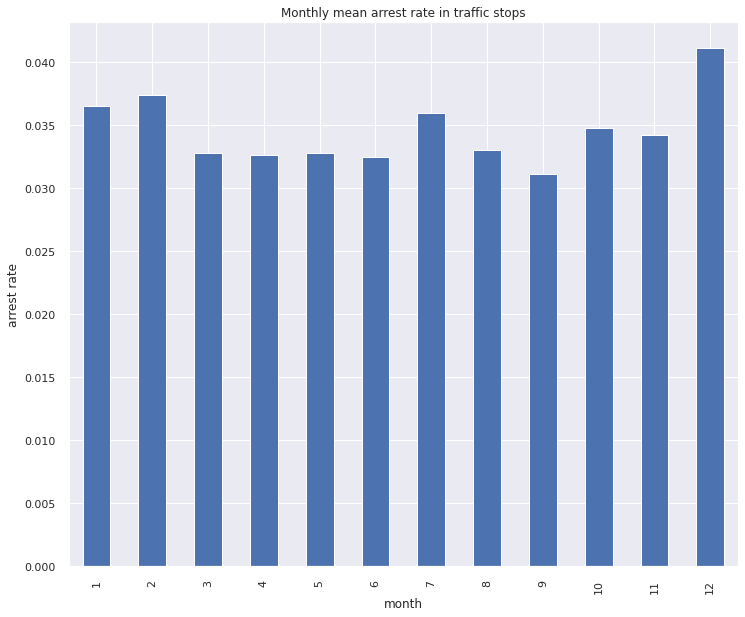

In [63]:
# e.g. Show the different months that can be accessed
figure = data.groupby(data.index.month).is_arrested.mean().plot(kind='bar')

plt.xlabel('month')
plt.ylabel('arrest rate')
plt.title('Monthly mean arrest rate in traffic stops')

# saving the plot is as easy as

plt.savefig('is_arrested_bymonth.pdf', format='pdf')

Using resampling to aggregate data rather than group it.

But isn't that the same what we just did before? Well, actually it's not the same. Instead of grouping by month (12 months), we will re-aggregate the data for the individual months: Jan 05 - Dec 15.

data.is_arrested.resample('M').mean()`

More on that here: Resampling time series data with pandas

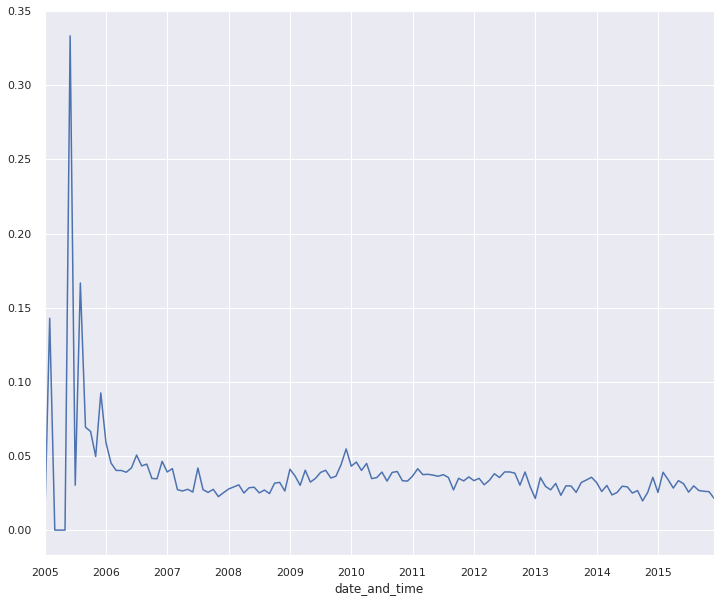

In [64]:
data.is_arrested.resample('M').mean().plot()

In [65]:
data.search_conducted.resample('M').mean()

date_and_time
2005-01-31    0.111111
2005-02-28    0.142857
2005-03-31    0.000000
2005-04-30    0.000000
2005-05-31    0.000000
                ...   
2015-08-31    0.027540
2015-09-30    0.021726
2015-10-31    0.021125
2015-11-30    0.022356
2015-12-31    0.021618
Freq: M, Name: search_conducted, Length: 132, dtype: float64

In [66]:
data['search_conducted'] = data.search_conducted.astype('bool')

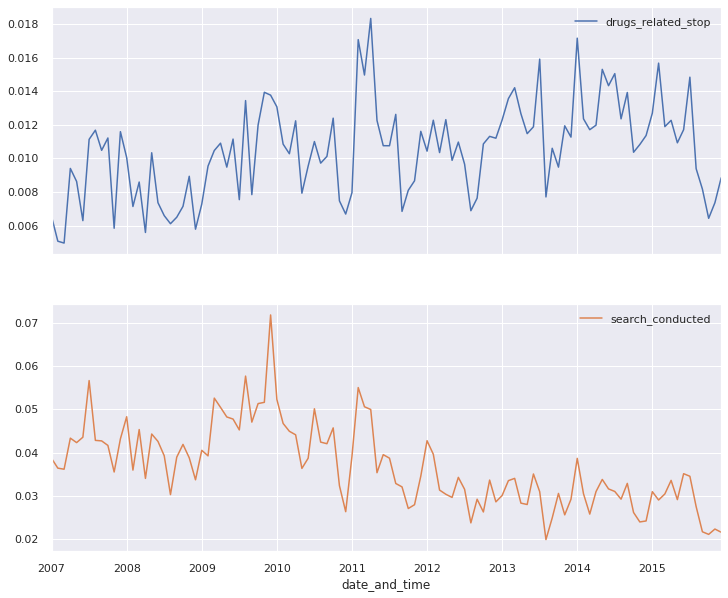

In [67]:
# Save the monthly rate of drug-related stops
monthly_drug_rate = data.drugs_related_stop.resample('M').mean()

# Calculate and save the monthly search rate
monthly_search_rate = data.search_conducted.resample('M').mean()

# Concatenate the two
monthly = pd.concat([monthly_drug_rate,monthly_search_rate], axis='columns')

# cut of a few years in the beginning
monthly = monthly[monthly.index>=pd.to_datetime('2007-1-1')]

# Create subplots from 'annual'
monthly.plot(subplots=True)

# Display the subplots
plt.show()

**Crosstabs**

Crosstabs allow us to explore categorical data considering varous dimensions. Actually, it is the same as grouping by several columns, counting it up with .size() and then bringing the data in wide format (using .unstack())


You'll agree that crosstab is easier...however for some reason computationally more expensive 🤔 Sidenote:


%time infront of a line of code to measure execution time %%time before executing a code-chunk (for instance a loop or a function which we will cover eventully)


%timeit will perform the same 10, 100, 1000 times and give you an average (you never know what your CPU and memory are up to at any moment)


In [68]:
%time data.groupby([data.driver_race, data.driver_gender]).size().unstack()

CPU times: user 56.8 ms, sys: 6.21 ms, total: 63 ms
Wall time: 65.1 ms


driver_gender,F,M
driver_race,,
Asian,2959,9865
Black,14760,53817
Hispanic,10261,42862
Other,255,1089
White,102903,241813


In [69]:
%time pd.crosstab(data.driver_race, data.driver_gender)

CPU times: user 76.6 ms, sys: 11 ms, total: 87.6 ms
Wall time: 86.8 ms


driver_gender,F,M
driver_race,,
Asian,2959,9865
Black,14760,53817
Hispanic,10261,42862
Other,255,1089
White,102903,241813


**Transforming categorical in to nummerical data**

You may have noted the stop_duration column in our dataset and that it is an object variable. That means, we can use it as a dimension but not to perform any calculations. What we can do, is map the categories to a reasonable nummerical value using a mapping dictionary the map command.

In [70]:
# First, we should inspect the unique values of the column:
# you could use the unique() command but value_counts() is helpful here,
# as it can help us identify outlier cases

data.stop_duration.value_counts() 

0-15 Min     386646
16-30 Min     76320
30+ Min       17612
1                 5
2                 1
Name: stop_duration, dtype: int64

As you can see, there are 6 rows that clearly don't fit and should probably be eliminated We need to filter the dataframe for observations where the stop_duration hase one of the three values: '0-15 Min', '16-30 Min', '30+ Min'

We can use pandas' isin function here. By the way: If you are doing the opposite "not in" query, you can set a ~ after the [ and it will inverse your selection.

In [71]:
# I'm lazy: First we can ask pandas to give us a list of possible values that we can copy-paste below into our query
data.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [72]:
# This step should be pretty familiar

data = data[data.stop_duration.isin(['0-15 Min', '16-30 Min', '30+ Min'])]

In [73]:
# Let's see if the inverse also works:

data[~data.stop_duration.isin(['0-15 Min', '16-30 Min', '30+ Min'])].stop_duration.unique()

array([], dtype=object)

As you can see, challenges pop up all the time and that's why working with data is not a linear or clean process but messy, at times confusing and will require you to look up things on the interenet all the time.

Now we can create a mapping dictionary. But wait, we never covered what a dictionary is.

A dictionary is one of Python's fundamental data structures. You already met ints, floats, strings. There are also lists, sets, tuples and dictionaries (these are the most common types).

For now: A dictionary maps keysto values

dict

You input a key and you get a value, disregarding the order. A dictionary has a slightly weird syntax with curly brackets and : but you'll get used to it.

In [74]:
# Let's create our mapping

mapping = {'0-15 Min':7.5, '16-30 Min':23, '30+ Min':45}

# And use it right away to create a new column
data['stop_duration_num'] = data.stop_duration.map(mapping)

# a quick check of what we achieved
print(data.stop_duration_num[:5])

date_and_time
2005-01-02 01:55:00     7.5
2005-01-02 20:30:00    23.0
2005-01-04 12:55:00     7.5
2005-01-06 01:30:00     7.5
2005-01-12 08:05:00    45.0
Name: stop_duration_num, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**A quick intro to loops**

The great advantage with computers is that they are happy to do boring repetitive stuff for us without getting tired. If we think a bit about the map function, what it did was to take every observation of stop_duration in our dataframe and translate it to the corresponding value in our mapping dictionary.


Let's try some made up pseudocode:



stop_duration_num = [] #creating an empty list


for every observation in data.stop_duration do:
    look up corresponding value in the mapping dictionary
    append the value to the stop_duration_num list


finally:

```
data['stop_duration_num'] = stop_duration_num list
```
Actually we can write exactly that as a loop




```
stop_duration_num_list = []
for x in data.stop_duration:
    value = mapping[x]
    stop_duration_num_list.append(value)
```




# we skip the creation of the new column since we already have it
Aside form for-loop as that one there are also while loops that will do something while some condition is met

You can find more on datatypes and loops (iteration) in this cheat sheet and many other places. Iteration is a core concept in computer science and will be important in later modules. If you code for the first time in your life, it's a slightly strange concept to get your head around but after some time it becomes second nature. For now, it's good to get some initial feeling for the concept.

**Let's return to our stop_duration problem**

Since, we created a nummerical value, we can for instance check if average stop duration is different for different violations:

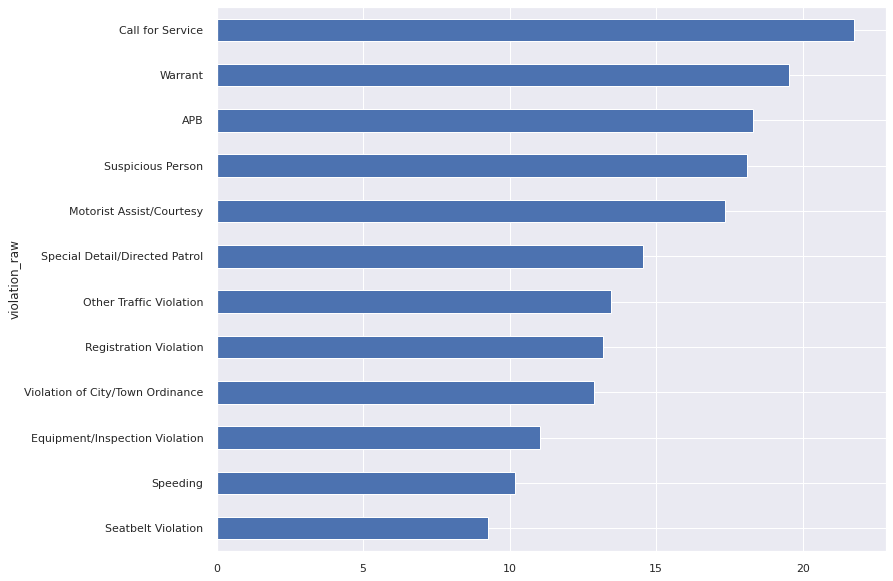

In [75]:
# Let's do everything in one line

data.groupby([data.violation_raw]).stop_duration_num.mean().sort_values().plot(kind='barh')

**Cutting intervals**

data.driver_age contains the the age of the driver. data.driver_age.dtype will tell us that it's a continuous nummerical value and thus good for more advanced analysis but perhaps a bit to detailed for exploration (?)


More instrumental in that context would be to slice that variable up into ordered categries corresponding to age-populations of interest, say "teen", "20s", "30s" etc.

In [76]:
# Let's check the variable
data.driver_age.describe()

count    478940.000000
mean         33.981793
std          12.702788
min          15.000000
25%          23.000000
50%          31.000000
75%          43.000000
max          99.000000
Name: driver_age, dtype: float64

In [77]:
# We can slice tha data into some numebr of bins (sometimes useful)
data['age_cat'] = pd.cut(data.driver_age,bins=6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
# We can also provide labels
labels=["teen", "20s", "30s", "40s", "50+"]
data['age_cat'] = pd.cut(data.driver_age, bins=5, labels=labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
# We can also provide custom intervals
# Unfortunately (not sure why) there is no way to do both together
bins = pd.IntervalIndex.from_tuples([(10, 20), (20, 30), (30, 40), (40,50), (50,100)])
data['age_cat'] = pd.cut(data.driver_age, bins = bins)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [80]:
data.dropna(subset=['age_cat'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


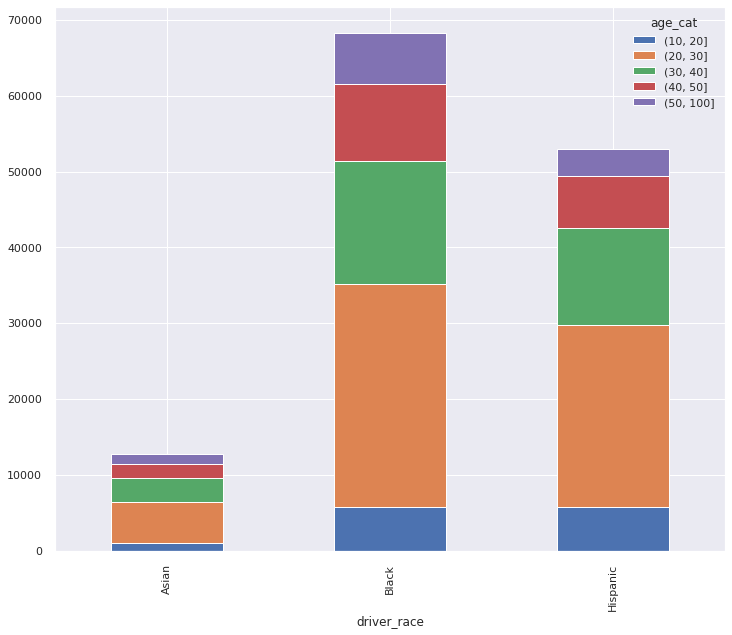

In [81]:
# We can plot that but perhaps let's modify a bit first
table = pd.crosstab(data.driver_race, data.age_cat)

# keep only minority races
table = table.iloc[:3,]

# let's plot some stacked bars
table.plot(kind='bar', stacked=True)

--- - - - 


**NEW SUBJECT**


Enters weather data¶
To be precise: Local climatological data from https://www.ncdc.noaa.gov/

I put the data in a Google Cloud bucket: https://storage.googleapis.com/sds-file-transfer/RI-weather.csv

In [84]:
weather = pd.read_csv('https://storage.googleapis.com/sds-file-transfer/RI-weather.csv')

In [85]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [86]:
weather[['AWND', 'WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


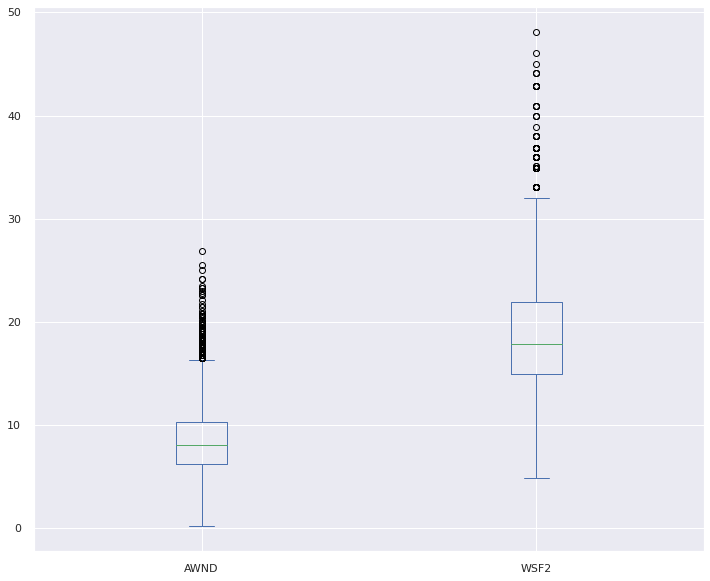

In [87]:
weather[['AWND', 'WSF2']].plot(kind='box') 

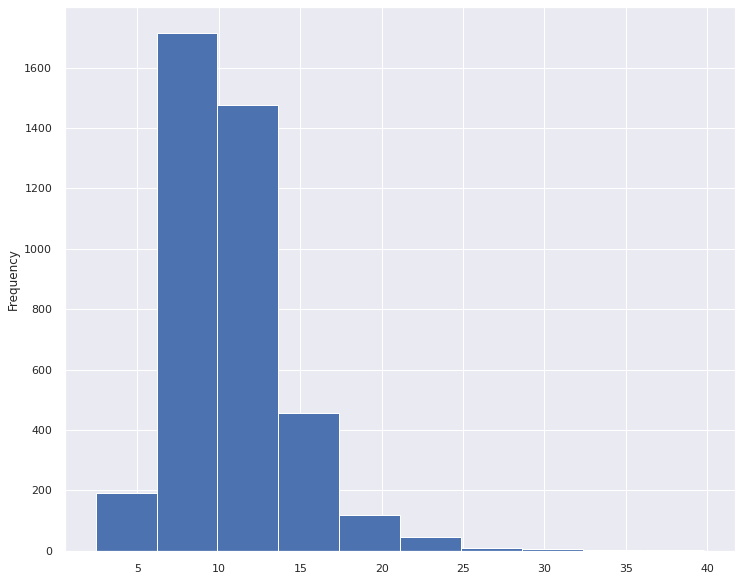

In [88]:
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist')

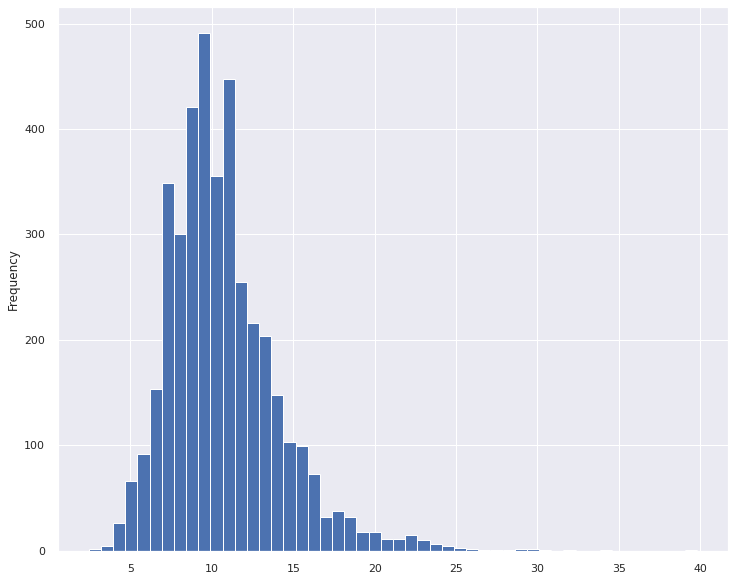

In [89]:
weather.WDIFF.plot(kind='hist', bins=50)
plt.savefig('fig1.pdf') # would like to save it for later? Pass this line in the same cell and you'll get the pdf

**Introducing Seaborn**

Seaborn is a great project with the mission to make statistical plots easier in Python. You can find more on their Homepage.


Datacamp created this cheat sheet that summarizes most important functions.

In [91]:
# We already imported seaborn (without talking a lot about it). Let's do it again, which is not a problem

import seaborn as sns # sns is the conventional abbriviation
sns.set(style="darkgrid") # Darkgrid is a nice ggplot (R) - like style that looks

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


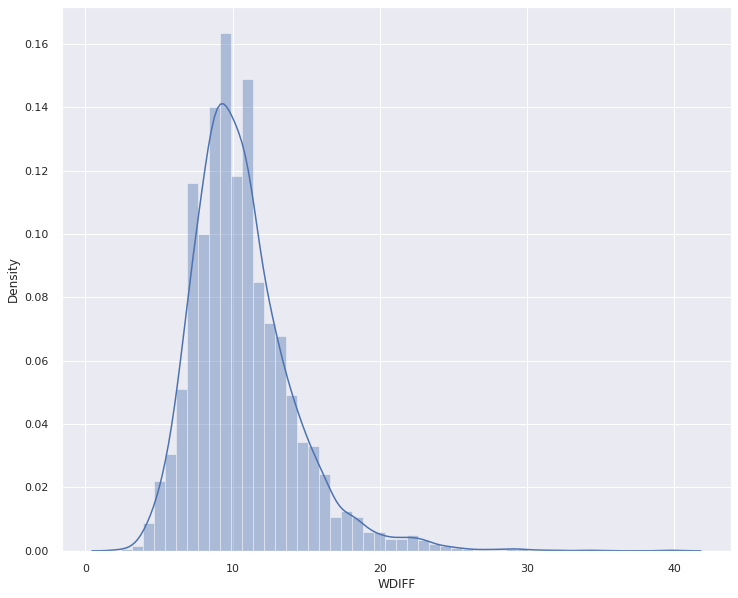

In [92]:
# Let's do the same what we just did but now using Searborn
# We replace the standard histogram by a Distribution plot (same same)
sns.distplot(weather.WDIFF)

You can read much more about all the different things that you can do with distplots here

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


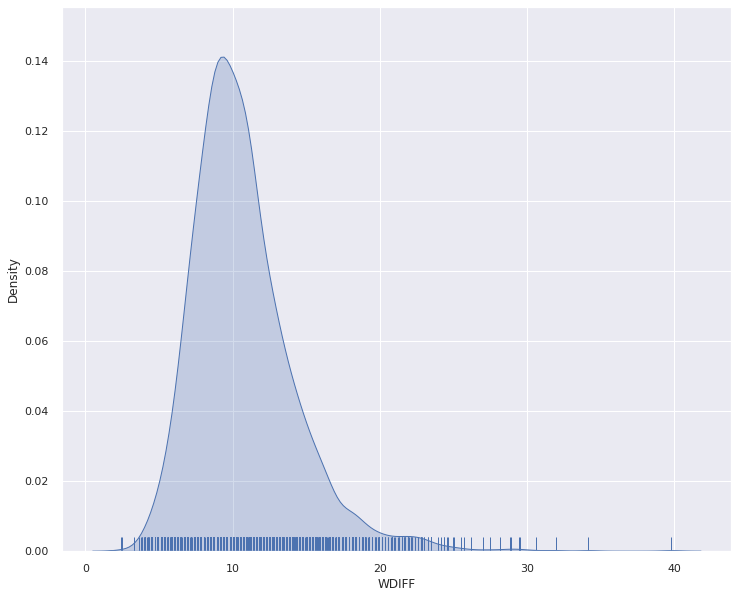

In [93]:
fig = sns.distplot(weather.WDIFF, hist=False,
             rug=True,
             kde_kws={'shade':True})

fig.figure.savefig('fig.pdf') # In case you would like to keep it :-)

In [94]:
# Further examining the weather data
weather.shape

(4017, 28)

In [95]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'WDIFF'],
      dtype='object')

In [96]:
#Let's select just a sequence of columns 'from-to'
temp = weather.loc[:, 'TAVG':'TMAX']

In [97]:
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


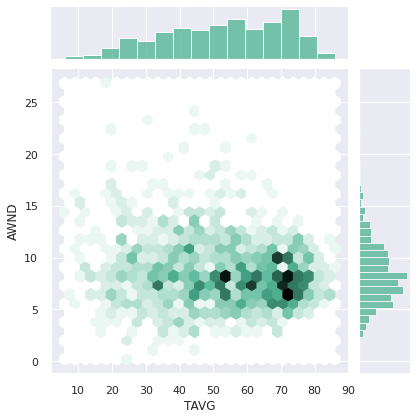

In [98]:
# Can we say something about average temperature and average wind?

sns.jointplot(weather.TAVG, weather.AWND, kind="hex", color="#4CB391")

**Data types advanced** 
LETS USE THE POLICE DATA AGAIN:

We already used the map function to transform strings to nummerical values. Now, let's try to create categories. This is not always necessary but nice to know.

In [99]:
mapping = {'0-15 Min':'short', '16-30 Min':'medium', '30+ Min':'long'}

In [100]:
data['stop_length'] = data.stop_duration.map(mapping)

In [101]:
data.stop_length.memory_usage(deep=True)

33584162

In [102]:
# We need to initiate this new data format first importing it
from pandas.api.types import CategoricalDtype

# Define our categories
cats = ['short', 'medium', 'long']

# And define the specific cateogory type (this is useful for survey data that is ordered)
cat_type = CategoricalDtype(categories=cats, ordered=True)

# Finally let's asign it
data['stop_length'] = data.stop_length.astype(cat_type)

In [103]:
data.stop_length.memory_usage(deep=True)

# The first thing we notice --> this type is much more memory friendly. This is good when moving towards big data

4310754

In [104]:
# Also now we see that pandas knows that short is short < medium < long
data.stop_length.head()


date_and_time
2005-01-02 01:55:00     short
2005-01-02 20:30:00    medium
2005-01-04 12:55:00     short
2005-01-06 01:30:00     short
2005-01-12 08:05:00      long
Name: stop_length, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [105]:
# Any relation between stop duration and likelihood to get arrested?
data.groupby('stop_length').is_arrested.mean()


stop_length
short     0.013021
medium    0.092601
long      0.257714
Name: is_arrested, dtype: float64

**Back to our weather data**

Do you think that arrest rates or certain violations are related to weather? For that we need to connect our weather data with the stops data

We will merge the two dataframes on the date index, as weather data is available daily

In [106]:
# First let's prepare the weather data first, by parsing the date-column
weather.DATE = pd.to_datetime(weather.DATE)

In [107]:
# We need to do the same with our stops data and its stop_date column
data.stop_date = pd.to_datetime(data.stop_date)

In [108]:
# now let's merge

data_weather = pd.merge(data, weather, left_on='stop_date', right_on='DATE', how='left')

Pandas merge command is fairly simple:

We start with the left dataframe "data" in our case, then the right "weather", then pass the left and the right key and finally the merger type: Here "left", meaning that we would like to keep the left as it is and multiply the right on top of it (if that makes sense)

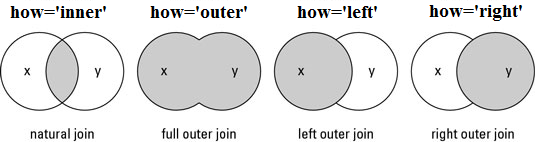**BILLEDE HER:**

And if you still think merging is mysterious then you should check out this [youtube tutorial](https://youtu.be/h4hOPGo4UVU)


In [109]:
# data_weather.set_index('date_and_time', inplace=True)
data_weather.index = data.index

It is a not totally crazy assumption that police stops are shorter if it's cold...maybe. Let's check that.


The syntax is a bit more advanced but I'll do my best to explain. We will control for the violation type, assuming that different violations lead to different durations by their nature.

In [110]:
# We need to aggregate the data first on 2 levels: Time and Violation.
# For this we need to use pandas Grouper module (I also had to look it up)
violation_duration = data_weather.groupby([pd.Grouper(key='stop_date', freq='D'), 'violation']).stop_duration_num.mean()

In [111]:
# Such groupby commands deliver a multi-indexed series. That's not useful for further work.
# But we can transform them into Dataframes with various index levels turning into columns.
violation_duration = pd.DataFrame(violation_duration).reset_index()

In [112]:
# Same for the temperature data
avg_temp = data_weather.resample('D').TAVG.mean()

In [113]:
avg_temp = pd.DataFrame(avg_temp).reset_index()

In [114]:
# Now let's merge both DFs
search_temp = pd.merge(violation_duration, avg_temp, left_on='stop_date', right_on='date_and_time', how='left')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


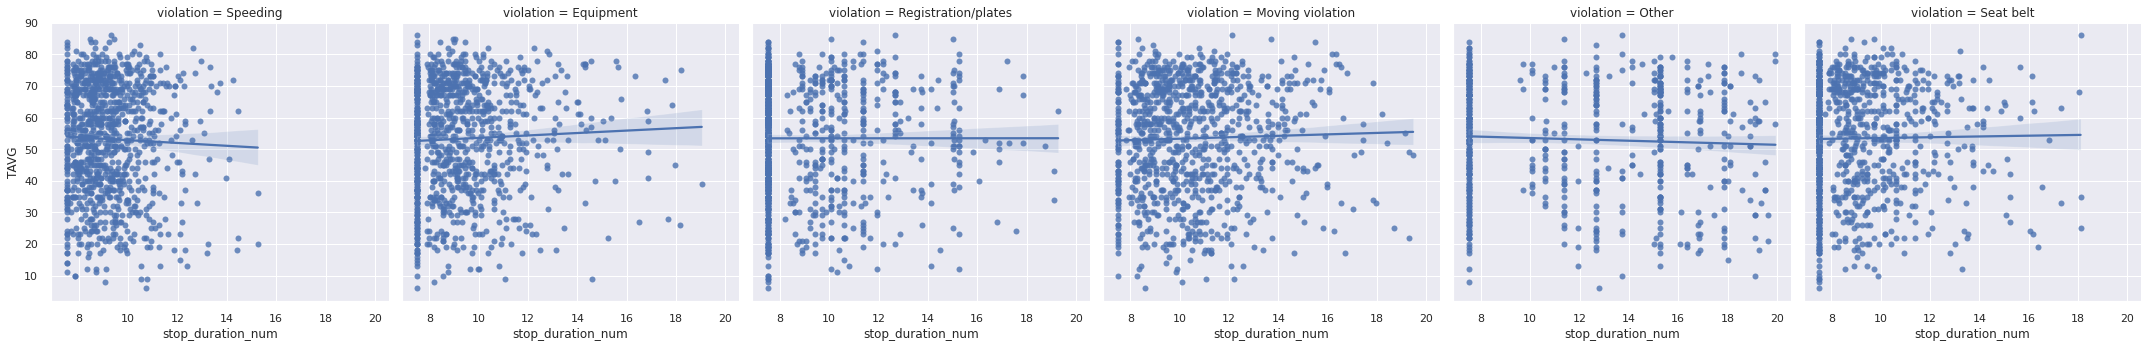

In [115]:
# We plot our resulting DF using Seaborn using the col argument to create subplots for the different violation types
sns.lmplot('stop_duration_num', 'TAVG', data=search_temp[search_temp.stop_duration_num < 20], col = 'violation')

**Heatmaps are another useful visualization¶**

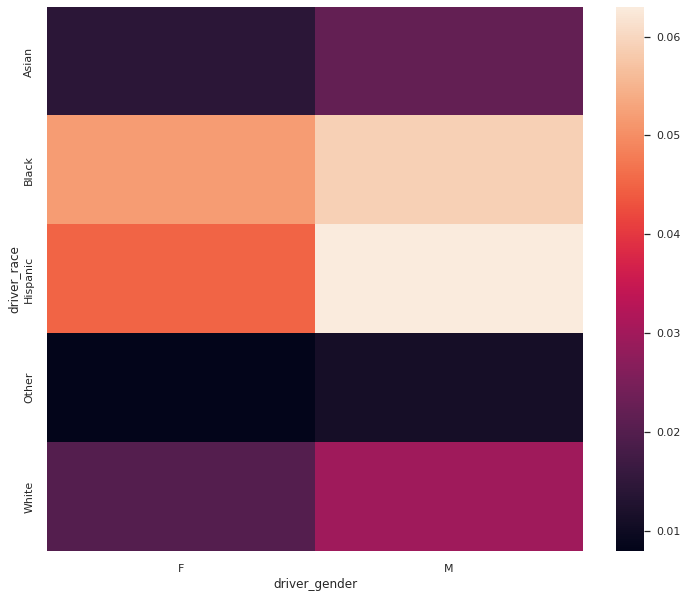

In [116]:
# You should by now be able to read this without problems
sns.heatmap(pd.crosstab(data.driver_race, data.driver_gender, values=data.is_arrested, aggfunc='mean'))

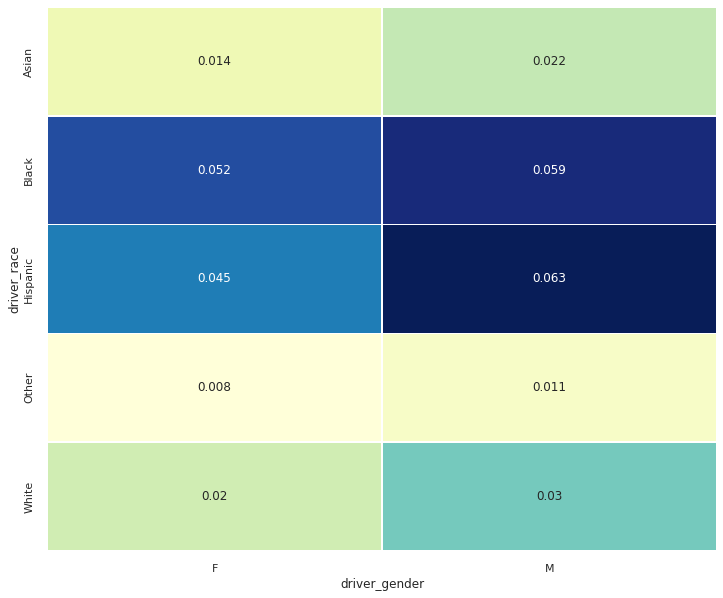

In [117]:
# We can make this heatmap more informative using some of Seaborn's functionality

sns.heatmap(pd.crosstab(data.driver_race, data.driver_gender, values=data.is_arrested, aggfunc='mean'),
            annot=True, cmap="YlGnBu", cbar=False, linewidths=.5)

**Search discrimination?**

Finally we would like to find out if searches are conducted more often for some races.

In [118]:
# First we need to create a boolean variable for searches
data['search_conducted'] = data.search_conducted.astype('bool')

In [119]:
# Calculate the search rate by race
search_rates = pd.crosstab(data.district, data.driver_race, data.search_conducted, aggfunc='mean')

### Exactly the same
# search_rates = data.groupby(['district','driver_race']).search_conducted.mean().unstack()

In [120]:
searches_per_district = data.groupby('district').size()

In [121]:
search_rates_per_district = pd.concat([search_rates, searches_per_district], axis = 1)

In [122]:
search_rates_per_district['stops'] = search_rates_per_district[0]

In [123]:
search_rates_per_district

,Asian,Black,Hispanic,Other,White,0,stops
district,,,,,,,
Zone K1,0.012410,0.051499,0.048443,0.000000,0.029810,45865,45865
Zone K2,0.015705,0.043097,0.039376,0.000000,0.022565,96684,96684
Zone K3,0.020729,0.072572,0.067843,0.017857,0.038085,108631,108631
Zone X1,0.008511,0.019718,0.019519,0.000000,0.009033,13195,13195
Zone X3,0.019358,0.048101,0.048463,0.011952,0.017390,89140,89140
Zone X4,0.033865,0.079589,0.076684,0.013043,0.037407,125425,125425


Now some more advanced plotting:


Can you understand what's going on here?

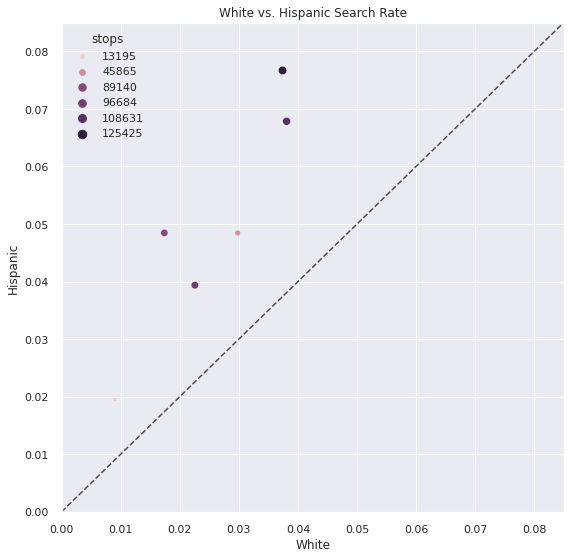

In [124]:
plt.figure(figsize=(9,9))
ax = plt.axes()
ax.set_title('White vs. Hispanic Search Rate')
plot = sns.scatterplot(x="White", y="Hispanic", size='stops', hue="stops", data=search_rates_per_district)
plt.axis([0,0.085,0,0.085])
plot.plot(plot.get_xlim(), plot.get_ylim(), ls="--", c=".3")

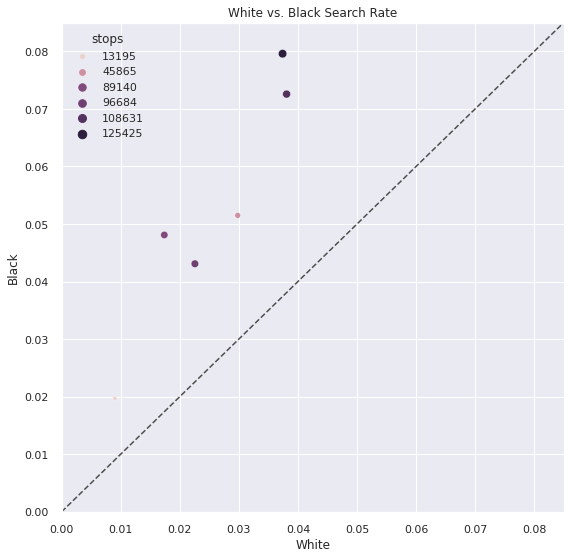

In [125]:
plt.figure(figsize=(9,9))
ax = plt.axes()
ax.set_title('White vs. Black Search Rate')
plot = sns.scatterplot(x="White", y="Black", size='stops', hue="stops", data=search_rates_per_district)
plt.axis([0,0.085,0,0.085])
plot.plot(plot.get_xlim(), plot.get_ylim(), ls="--", c=".3")

In [126]:
found_rates = data.groupby(['district','driver_race']).contraband_found.sum() / data.groupby(['district','driver_race']).search_conducted.sum() 
found_rates_per_district = pd.concat([found_rates.unstack(),data.groupby('district').search_conducted.sum()], axis = 1)

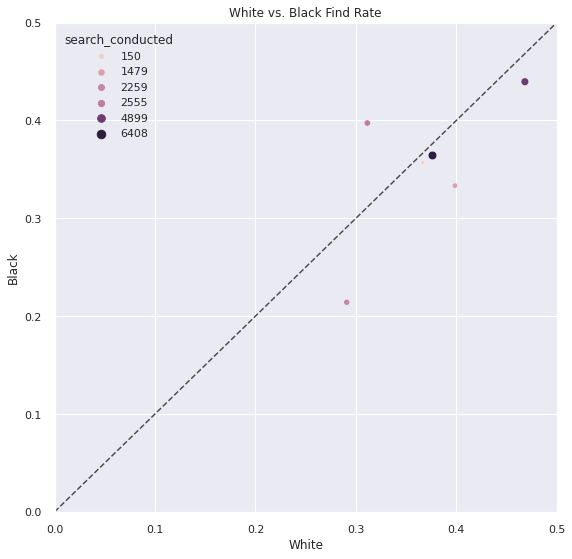

In [127]:
plt.figure(figsize=(9,9))
ax = plt.axes()
ax.set_title('White vs. Black Find Rate')
plot = sns.scatterplot(x="White", y="Black", size='search_conducted', hue="search_conducted", data=found_rates_per_district)
plt.axis([0,0.5,0,0.5])
plot.plot(plot.get_xlim(), plot.get_ylim(), ls="--", c=".3")

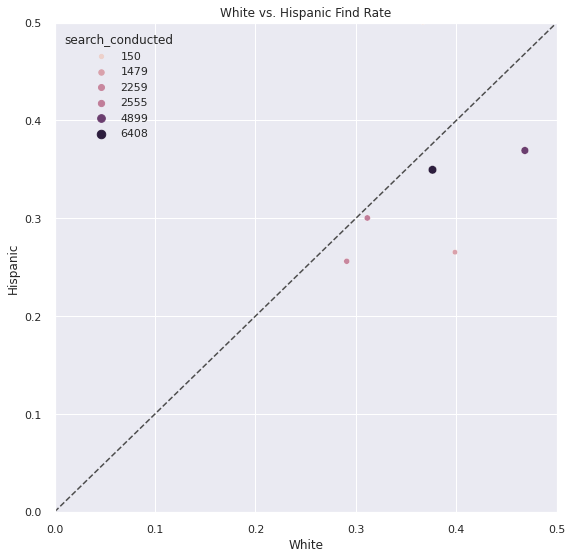

In [128]:
plt.figure(figsize=(9,9))
ax = plt.axes()
ax.set_title('White vs. Hispanic Find Rate')
plot = sns.scatterplot(x="White", y="Hispanic", size='search_conducted', hue="search_conducted", data=found_rates_per_district)
plt.axis([0,0.5,0,0.5])
plot.plot(plot.get_xlim(), plot.get_ylim(), ls="--", c=".3")